# Silicon

Use conda environment python3

## Load libraries

In [1]:
import netcdf_tools
import numpy as np
import pandas as pd

## Select year

In [2]:
nbyr=10
years=range(1,nbyr+1)
array1d_iT_iTforplot=np.arange(1,365*nbyr+1)
array1d_iT_iTforpcolormesh=np.arange(1,365*nbyr+2)

last_year=np.arange(365*(nbyr-1)+0,365*(nbyr-1)+365)
array1d_iT1y_iT=last_year

locs=list()
xticklabels=range(5,nbyr+1,5)
for year in xticklabels:
    loc=1+365*(year-1)
    locs.append(loc)

## Read outputs

RF is the r coordinate of cell intrface (in m)

In [3]:
gridfile='grid.t001.nc';
RF=netcdf_tools.read_netcdf(gridfile,'RF')

drF is the r cell face separation, meaning the thickness of each depth layer (in m)

it corresponds to delR on https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html#grid

In [4]:
drF=netcdf_tools.read_netcdf(gridfile,'drF')

In [5]:
gudfile='car.0000000000.t001.nc';

array2d_idepth_iT_SiO2=netcdf_tools.read_netcdf(gudfile, 'TRAC06').squeeze().transpose() # SiO2; mmol Si m^-3
array2d_idepth_iT_POSi=netcdf_tools.read_netcdf(gudfile, 'TRAC15').squeeze().transpose() # POSi; mmol Si m^-3
array2d_idepth_iT_diatoms01=netcdf_tools.read_netcdf(gudfile, 'TRAC35').squeeze().transpose() # Si in diatoms 1; mmol C m^-3
array2d_idepth_iT_diatoms02=netcdf_tools.read_netcdf(gudfile, 'TRAC36').squeeze().transpose() # Si in diatoms 2; mmol C m^-3
array2d_idepth_iT_diatoms03=netcdf_tools.read_netcdf(gudfile, 'TRAC37').squeeze().transpose() # Si in diatoms 3; mmol C m^-3
array2d_idepth_iT_diatoms04=netcdf_tools.read_netcdf(gudfile, 'TRAC38').squeeze().transpose() # Si in diatoms 4; mmol C m^-3
array2d_idepth_iT_diatoms05=netcdf_tools.read_netcdf(gudfile, 'TRAC39').squeeze().transpose() # Si in diatoms 5; mmol C m^-3
array2d_idepth_iT_diatoms06=netcdf_tools.read_netcdf(gudfile, 'TRAC40').squeeze().transpose() # Si in diatoms 6; mmol C m^-3
array2d_idepth_iT_diatoms07=netcdf_tools.read_netcdf(gudfile, 'TRAC41').squeeze().transpose() # Si in diatoms 7; mmol C m^-3
array2d_idepth_iT_diatoms08=netcdf_tools.read_netcdf(gudfile, 'TRAC42').squeeze().transpose() # Si in diatoms 8; mmol C m^-3
array2d_idepth_iT_diatoms09=netcdf_tools.read_netcdf(gudfile, 'TRAC43').squeeze().transpose() # Si in diatoms 9; mmol C m^-3

array2d_idepth_iT_nonlivingSi=array2d_idepth_iT_SiO2+array2d_idepth_iT_POSi # Si in SiO2+POSi; mmol Si m^-3

array2d_idepth_iT_diatoms=array2d_idepth_iT_diatoms01+array2d_idepth_iT_diatoms02+\
array2d_idepth_iT_diatoms03+array2d_idepth_iT_diatoms04+array2d_idepth_iT_diatoms05+\
array2d_idepth_iT_diatoms06+array2d_idepth_iT_diatoms07+array2d_idepth_iT_diatoms08+\
array2d_idepth_iT_diatoms09; # Si in diatoms; mmol C m^-3

R_SiC=16/120 # See data.gud
array2d_idepth_iT_Sidiatoms=array2d_idepth_iT_diatoms*R_SiC # Si in diatoms; mmol Si m^-3

array2d_idepth_iT_Si=array2d_idepth_iT_nonlivingSi+array2d_idepth_iT_Sidiatoms

# Prepare plots of $SiO_2$, $POSi$, $SiO_2$+$POSi$ and $SiO_2$+$POSi$+Si in diatoms

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# adapted from
# https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
# answer of Pedro M Duarte
SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 28

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the x tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the y tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Vertical integration of silicon

In [8]:
import vstats

In [9]:
array1d_iT_Si0to354  =vstats.vintegrate(array2d_idepth_iT_Si, drF,  0, 73)
array1d_iT_Si354to360=vstats.vintegrate(array2d_idepth_iT_Si, drF, 73, 74)
array1d_iT_Si0to360  =vstats.vintegrate(array2d_idepth_iT_Si, drF,  0, 74)

# Vertical integration of silicic acid

In [10]:
array1d_iT_silicic0to100=vstats.vint(
    array2d_idepth_iT_tracer=array2d_idepth_iT_SiO2,
    array1d_idepth_delR=drF,
    depth_end=-100)

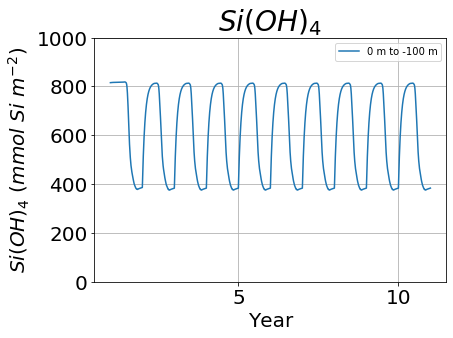

In [11]:
plt.figure(figsize=(6.4,4.8))
plt.plot(array1d_iT_iTforplot,
         array1d_iT_silicic0to100,
         label='0 m to -100 m')
plt.title('$Si{(OH)}_4$')
plt.xlabel('Year')
plt.ylim(0,1000)
plt.ylabel('$Si{(OH)}_4\ (mmol\ Si\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.n.vintSiOH4.png')

# Silicic acid vertically integrated (0-100m) on May 15

($mmol\ Si\ m^{-2}$)

In [12]:
silicic0to100_onMay15=array1d_iT_silicic0to100[array1d_iT1y_iT][134]
silicic0to100_onMay15

812.2802586833157

In [13]:
df=pd.DataFrame({'silicicacid0_100_onMay15_mmolSim2':[silicic0to100_onMay15]})
df

,silicicacid0_100_onMay15_mmolSim2
0,812.280259


In [14]:
outfile='silicic0_100_onMay15.csv'
df.to_csv(outfile,index=False)

# Annual drift of silicon

In [15]:
nbdepth=RF.size-1
nbyr=10
array2d_idepth_iyr2tolast_deltaSiO2=np.zeros((nbdepth,nbyr-1))
for iyr in range(2,nbyr+1):
    iTcurrent=365*(iyr-1)+364
    array1d_idepth_SiO2current=array2d_idepth_iT_SiO2[:,iTcurrent]
    iTprevious=365*(iyr-2)+364
    array1d_idepth_SiO2previous=array2d_idepth_iT_SiO2[:,iTprevious]
    array1d_idepth_deltaSiO2=array1d_idepth_SiO2current-array1d_idepth_SiO2previous
    array2d_idepth_iyr2tolast_deltaSiO2[:,iyr-2]=array1d_idepth_deltaSiO2
array1d_iyr_yr=np.arange(1,nbyr+1)

# All plots on the same figure

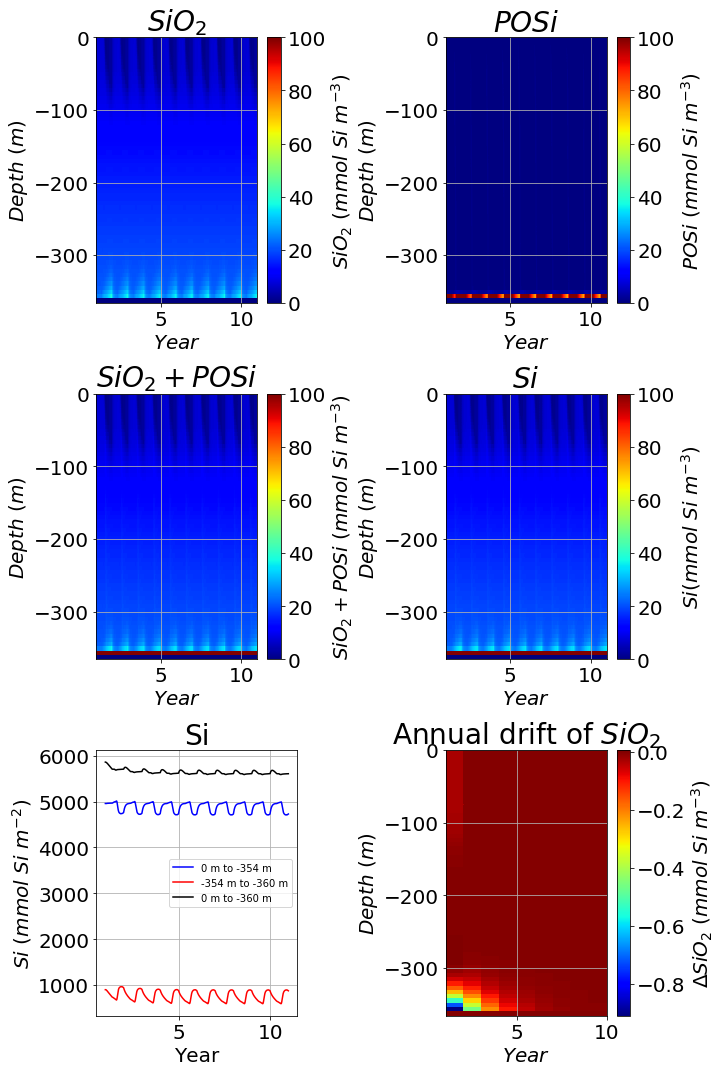

In [16]:
plt.figure(figsize=(10,15))

plt.subplot2grid(shape=(3,2), loc=(0,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh,RF,
               array2d_idepth_iT_SiO2,
               cmap='jet',
               vmin=0,
               vmax=100)
plt.title('$SiO_2$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$SiO_2\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(0,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_POSi,
               cmap='jet',
               vmin=0,
               vmax=100)
plt.title('$POSi$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$POSi\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_nonlivingSi,
               cmap='jet',
               vmin=0,
               vmax=100)
plt.title('$SiO_2+POSi$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$SiO_2+POSi\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_Si,
               cmap='jet',
               vmin=0,
               vmax=100)
plt.title('$Si$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$Si (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(2,0))
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
plt.legend(loc='lower right')
plt.title('Si')
plt.xlabel('Year')
plt.ylabel('$Si\ (mmol\ Si\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()

plt.subplot2grid(shape=(3,2), loc=(2,1))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaSiO2,
               cmap='jet')
plt.title('Annual drift of $SiO_2$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta SiO_2\ (mmol\ Si\ m^{-3})$')

plt.tight_layout()

plt.savefig('car.0000000000.t001.allyears.si.largecbar.png')

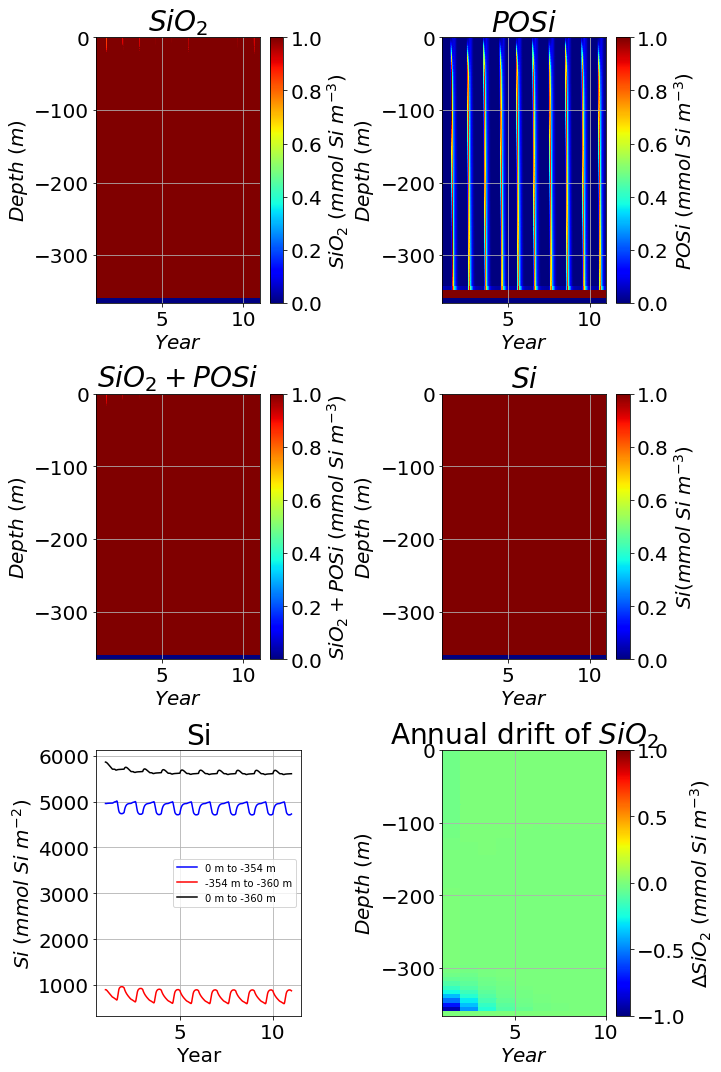

In [17]:
plt.figure(figsize=(10,15))

plt.subplot2grid(shape=(3,2), loc=(0,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_SiO2,
               cmap='jet',
               vmin=0,
               vmax=1)
plt.title('$SiO_2$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$SiO_2\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(0,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_POSi,
               cmap='jet',
               vmin=0,
               vmax=1)
plt.title('$POSi$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$POSi\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,0))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_nonlivingSi,
               cmap='jet',
               vmin=0,
               vmax=1)
plt.title('$SiO_2+POSi$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$SiO_2+POSi\ (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(1,1))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_Si,
               cmap='jet',
               vmin=0,
               vmax=1)
plt.title('$Si$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$Si (mmol\ Si\ m^{-3})$')

plt.subplot2grid(shape=(3,2), loc=(2,0))
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
plt.legend(loc='lower right')
plt.title('Si')
plt.xlabel('Year')
plt.ylabel('$Si\ (mmol\ Si\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()

plt.subplot2grid(shape=(3,2), loc=(2,1))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaSiO2,
               cmap='jet',
               vmin=-1,
               vmax=1)
plt.title('Annual drift of $SiO_2$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta SiO_2\ (mmol\ Si\ m^{-3})$')

plt.tight_layout()

plt.savefig('car.0000000000.t001.allyears.si.smallcbar.png')

# Conclusion

**Is silicon at equilibrium?**

Yes.

**Is there a drift of silicon?**

$SiO_2$ is in steady-state by year 8.

# Generation of individual plots

## Drift of $SiO_2$

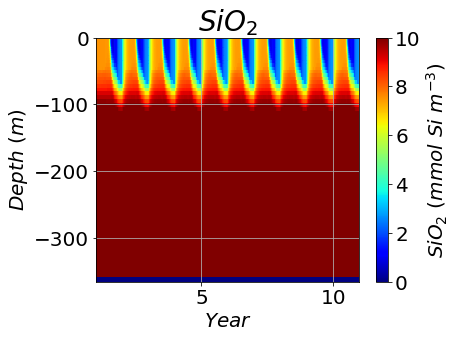

In [18]:
plt.figure(figsize=(6.4,4.8))
plt.pcolormesh(array1d_iT_iTforpcolormesh, RF,
               array2d_idepth_iT_SiO2,
               cmap='jet',
               vmin=0,
               vmax=10
              )
plt.title('$SiO_2$')
plt.xlabel('$Year$')
plt.xticks(locs,xticklabels)
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$SiO_2\ (mmol\ Si\ m^{-3})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.si.SiO2.png')

## Equilibrium of silicon

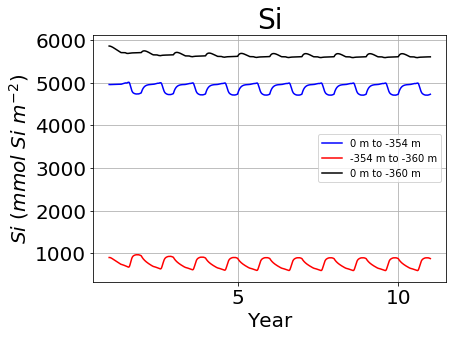

In [19]:
plt.figure(figsize=(6.4,4.8))
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to354,  color='blue', linestyle='-',
         label='0 m to -354 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si354to360,color='red',  linestyle='-',
         label='-354 m to -360 m')
plt.plot(array1d_iT_iTforplot,array1d_iT_Si0to360,  color='black',linestyle='-',
         label='0 m to -360 m')
plt.legend(loc='lower right')
plt.title('Si')
plt.xlabel('Year')
plt.ylabel('$Si\ (mmol\ Si\ m^{-2})$')
plt.grid(True)
plt.xticks(locs,xticklabels)
plt.legend()
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.si.vintSi.png')

## Annual drift of $SiO_2$

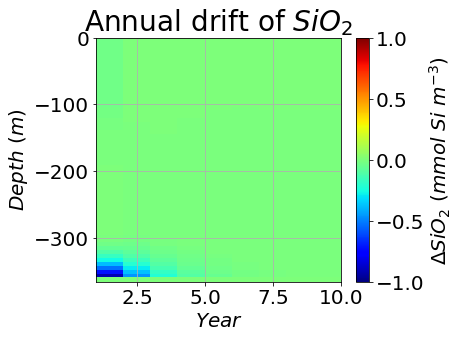

In [20]:
plt.figure(figsize=(6.4,4.8))
plt.pcolormesh(array1d_iyr_yr, RF,
               array2d_idepth_iyr2tolast_deltaSiO2,
               cmap='jet',
               vmin=-1,
               vmax=1)
plt.title('Annual drift of $SiO_2$')
plt.xlabel('$Year$')
plt.ylabel('$Depth\ (m)$')
plt.grid(True)
cbar=plt.colorbar()
cbar.set_label('$\Delta SiO_2\ (mmol\ Si\ m^{-3})$')
plt.tight_layout()
plt.savefig('car.0000000000.t001.allyears.si.deltaSiO2.png')